Variance for current image: 152.2189894741521
Variance for current image: 152.2189894741521


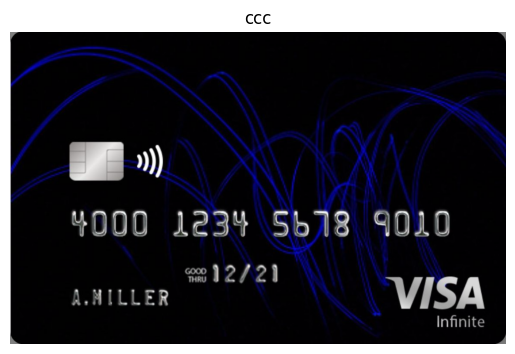

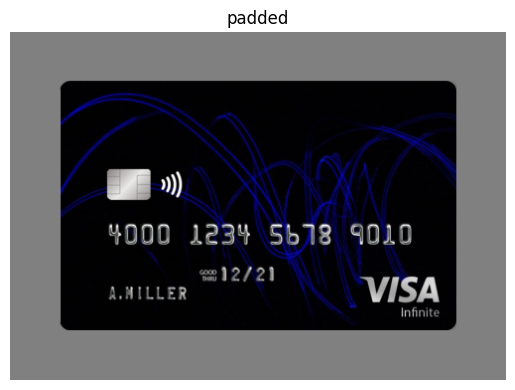

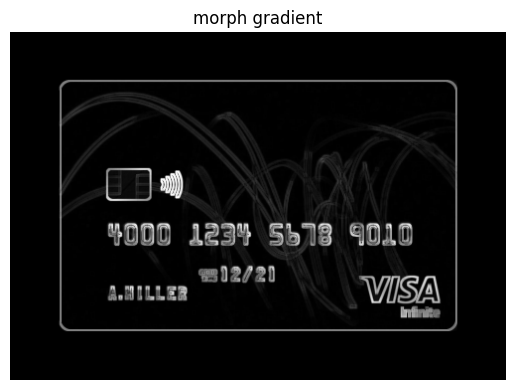

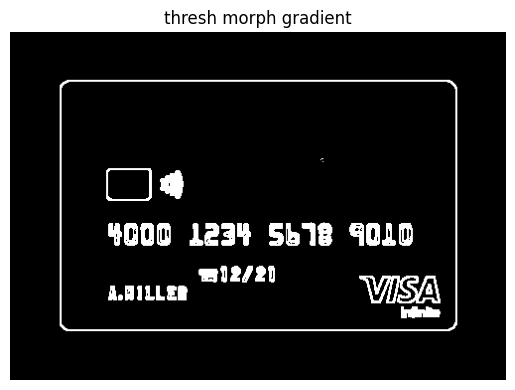

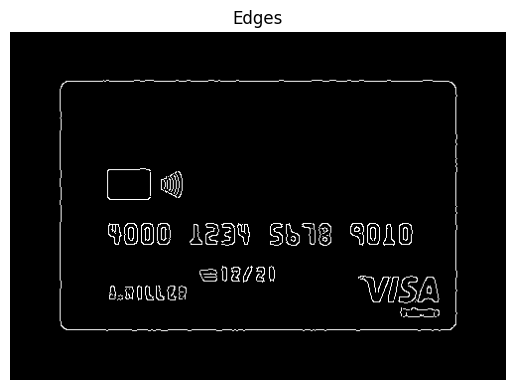

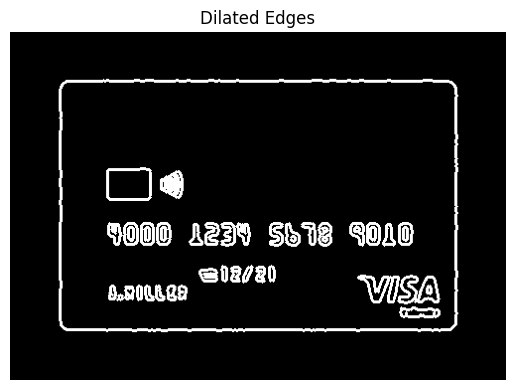

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import math
# Load the image
def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()
def resize_image(img, target_width):
    # Read the image
    
    if img is None:
        print("Error: Image not found or unable to load.")
        return
    
    # Get the original dimensions
    height, width = img.shape[:2]
    
    # Calculate the new height to maintain the aspect ratio
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent)))
    
    # Resize the image
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Save the resized image
    return new_img


def resize_image_quality(img, target_width):
    # Check if the image is loaded
    if img is None:
        print("Error: Image not found or unable to load.")
        return None
    
    # Get the original dimensions
    height, width = img.shape[:2]
    
    # Calculate the new height to maintain the aspect ratio
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent)))
    
    # Resize the image with high-quality interpolation
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_LANCZOS4)
    
    return new_img



def pattern_fix_inFreqDomain(img):
    # Convert to grayscale if the image has 3 channels
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Perform Fourier transform
    ft_img = np.fft.fft2(img)
    centered_ft_img = np.fft.fftshift(ft_img)  # Shift zero frequency component to the center
    magnitude_spectrum = np.log(np.abs(centered_ft_img) + 1)
    
    height, width = img.shape
    crow, ccol = height // 2, width // 2
    
    # Create a mask with the same dimensions as the image
    mask = np.ones((height, width), np.uint8)
    mask[crow-1:crow+1, ccol+5:ccol+16] = 0  # Smaller frequency region
    mask[crow-1:crow+1, ccol-16:ccol-5] = 0  # Smaller frequency region

    # Apply mask to the centered FT image
    f_shift_masked = centered_ft_img * mask
    Unshifted_image = np.fft.ifftshift(f_shift_masked)
    image_restored = np.fft.ifft2(Unshifted_image).real
    visualization_img = np.abs(image_restored)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    # Apply dilation to fill regions
    visualization_img = cv2.dilate(visualization_img, kernel, iterations=1)

    # Optional: Apply erosion to refine the filled regions
    eroded_image = cv2.erode(visualization_img, kernel, iterations=1)
    visualization_img=cv2.threshold(visualization_img, 120, 255, cv2.THRESH_BINARY)[1]

    return visualization_img, magnitude_spectrum

image = cv2.imread('01 - Straightforward.jpg')
# image = cv2.imread('02 - You can do it.jpg')
# image = cv2.imread('03 - Should be okay.jpg')
# image = cv2.imread('04 - Still ok, I hope.jpg')
# image = cv2.imread('05 - Looks cool, hope it runs cool too.jpg')
# image = cv2.imread('06 - Hatetlewe7 hatlewe7.jpg')
# image = cv2.imread('08 - Ew3a soba3ak ya3am.jpg')
# image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg')
# image = cv2.imread('10 - Mal7 w Felfel.jpg')#xxxxxxxxxxxxxxxxxx
# image = cv2.imread('11 - Ya setty ew3i.jpg')
# image = cv2.imread('12 - weewooweewoo.jpg')#xxxxxxxxxxxxxxxxx
# image = cv2.imread('13 - Matozbot el camera ya Kimo.jpg')#blurred
# image = cv2.imread('14 - 2el noor 2ata3.jpg')#xxxxxxxxxxxxxxxxxxx
# image = cv2.imread('15 - Compresso Espresso.jpg')#xxxxxxxxxxxxxxxxxxxxxxxxxxxx
# image = cv2.imread('16 - Sheel el kart yastaaaa.jpg')
# image = cv2.imread('07 - Hatet3eweg hat3eweg.jpg')

# List of image file names
# image_files = [
#     '01 - Straightforward.jpg',
#     '02 - You can do it.jpg',
#     '03 - Should be okay.jpg',
#     '04 - Still ok, I hope.jpg',
#     '05 - Looks cool, hope it runs cool too.jpg',
#     '06 - Hatetlewe7 hatlewe7.jpg',
#     '07 - Hatet3eweg hat3eweg.jpg',
#     '08 - Ew3a soba3ak ya3am.jpg',
#     '09 - El spero spathis we23et 3aaaa.jpg',
#     '10 - Mal7 w Felfel.jpg',
#     '11 - Ya setty ew3i.jpg',
#     '12 - weewooweewoo.jpg',
#     '13 - Matozbot el camera ya Kimo.jpg',
#     '14 - 2el noor 2ata3.jpg',
#     '15 - Compresso Espresso.jpg',
#     '16 - Sheel el kart yastaaaa.jpg'
# ]

def is_high_frequency(image, threshold=2500):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply the Laplacian operator to detect edges (high frequency)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Compute the variance of the Laplacian
    variance = laplacian.var()
    print(f"Variance for current image: {variance}")
    
    # Check if the variance exceeds the threshold for high frequency
    return 9000>variance > 2500




def hasSaltAndPepper(image, threshold=2500):
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply the Laplacian operator to detect edges (high frequency)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Compute the variance of the Laplacian
    variance = laplacian.var()
    print(f"Variance for current image: {variance}")
    
    # Check if the variance exceeds the threshold for high frequency
    return 9000<variance

def removesaltAndPepper(img):
    # Convert to grayscale
    showImage('',image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 5), 0)
    showImage("blurred",blurred)

    # rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    _, thresholded_image = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)
    showImage("thresh",thresholded_image)

    filtered_image = cv2.medianBlur(thresholded_image, ksize=3)  # ksize is the size of the kernel, must be an odd number
    # showImage('Original Image', rgbImage)
    showImage('Filtered Image', filtered_image)
    return filtered_image


if is_high_frequency(image):
    print("Image is high frequency")
    image,_=pattern_fix_inFreqDomain(image)
    

if hasSaltAndPepper(image):
    print("Image has salt and pepper noise")
    image = removesaltAndPepper(image)
    


# # Loop through each image and test if it's high frequency
# for file_name in image_files:
#     image = cv2.imread(file_name)
#     if image is not None:
#         result = is_high_frequency(image)
#         print(f"{file_name}: {'High Frequency' if result else 'Normal Frequency'}")
#     else:
#         print(f"Error loading image: {file_name}")
showImage("ccc",image)



image=resize_image(image,400)
imagehq=resize_image_quality(image,400)



    
# Get the color of the top-left pixel
# Get the color of the top-left pixel and convert it to a tuple
# Get the color of the top-left pixel



# Get the top-left pixel value
top_left_pixel = image[0, 0]

# Convert the top-left pixel to a tuple of integers
if len(image.shape) == 2:  # Grayscale image
    top_left_pixel = int(top_left_pixel)
else:  # BGR image
    top_left_pixel = tuple(map(int, top_left_pixel))
# Define the padding size
pad_size = 50  # You can change this to the desired padding size

# Pad the image with the top-left pixel color
padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)

padded_imagehq = cv2.copyMakeBorder(imagehq, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)
showImage("padded",padded_image)

if len(padded_image.shape)==3:
    gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)
else:
    gray = padded_image
kernel_size = (3,3)  # Width and height of the rectangle
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Perform dilation
dilated_image = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
showImage("morph gradient",dilated_image,cmap="gray")

thresh2 = cv2.threshold(dilated_image, 60, 170, cv2.THRESH_BINARY)[1]
showImage("thresh morph gradient",thresh2,cmap="gray")
# Preprocess the image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
blurred = cv2.GaussianBlur(gray, (9, 9), 0)#9x0
blurred = cv2.convertScaleAbs(blurred)
# Apply Canny edge detector
edges = cv2.Canny(blurred, 10, 110)

# Define a rectangular kernel for dilation
kernel_size = (3, 3)  # Adjust the size as needed
rectangular_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)

# Apply dilation with the rectangular kernel
dilated_edges = cv2.dilate(edges, rectangular_kernel, iterations=1)


showImage("Edges", edges, cmap='gray')
# Display the dilated edges
showImage("Dilated Edges", dilated_edges, cmap='gray')



[((214, 300), (348, 300)), ((56, 50), (124, 50)), ((50, 250), (50, 192)), ((63, 300), (121, 300)), ((449, 56), (450, 108)), ((449, 194), (449, 142))]


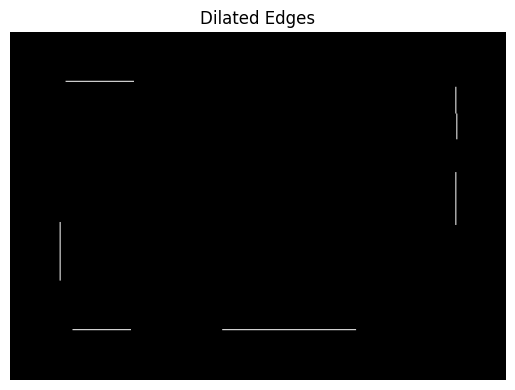

In [2]:

# Define parameters for Hough Line Transform
rho = 1# Distance resolution in pixels of the Hough grid
theta = np.pi / 186  # Angular resolution in radians of the Hough grid
threshold = 20  # Minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # Minimum number of pixels making up a line
max_line_gap = 3  # Maximum gap in pixels between connectable line segments
line_image = np.copy(dilated_edges) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

if lines is not None and len(lines)>=4:
    # Function to calculate line length
    def line_length(line):
        x1, y1, x2, y2 = line
        return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Calculate lengths of all lines
    line_lengths = [(line, line_length(line[0])) for line in lines]

    # Sort lines based on their lengths (longest first)
    line_lengths.sort(key=lambda x: x[1], reverse=True)

    # Select the first 4 lines
    top_lines = [line for line, length in line_lengths[:4]]

    # Calculate the length of the 4th longest line to compare against
    length_threshold = line_lengths[3][1] * 0.5  # Example threshold: 50% of the 4th longest line

    # Filter out lines that are significantly shorter than the 4th longest line
    filtered_lines = [line for line, length in line_lengths if length >= length_threshold]

    # Convert lines to the desired format
    formatted_lines = [((line[0][0], line[0][1]), (line[0][2], line[0][3])) for line in filtered_lines]

    print(formatted_lines)

    # Draw the filtered lines on the blank image
    for line in formatted_lines:
        (x1, y1), (x2, y2) = line  # Unpack line correctly
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 1)

    # Draw the lines on the  image
    lines_edges = cv2.addWeighted(dilated_edges, 0.8, line_image, 1, 0)
    showImage("Dilated Edges", line_image, cmap='gray')
else:
    print("No lines detected")
    if len(padded_image.shape)==3:

        gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)

    else:
        gray = padded_image
        
    showImage("gray", gray, cmap="gray")
    
    # Detect edges
    gray = cv2.convertScaleAbs(gray)

    edges = cv2.Canny(gray, 50, 150)
    showImage("edges", edges, cmap="gray")

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Combine all contours into one by concatenating their points
    all_contours = np.vstack(contours)

    # Compute the convex hull of the combined contours
    hull = cv2.convexHull(all_contours)

    # Approximate the convex hull to make edges sharper
    epsilon = 0.1 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)

    # Create a mask for dilation
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [approx], -1, 255, thickness=cv2.FILLED)

    # Dilate the mask to expand the convex hull
    dilated_mask = cv2.dilate(mask, np.ones((10, 10), np.uint8), iterations=1)
    paddedcopy=padded_image.copy()
    # Find contours in the dilated mask
    dilated_contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw the dilated convex hull on the original image
    for contour in dilated_contours:
        cv2.drawContours(paddedcopy, [contour], -1, (0, 255, 0), 2)  # Green color with thickness 2

    # Display the result
    showImage('Dilated Convex Hull', paddedcopy)


C:\Users\Mohamed Amr\AppData\Local\Temp\ipykernel_8916\216464737.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  x_top = (0 - intercept) / slope
C:\Users\Mohamed Amr\AppData\Local\Temp\ipykernel_8916\216464737.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  x_bottom = (height - intercept) / slope


Extended lines: [((0, 300), (500, 300)), ((0, 50), (500, 50)), ((50, 0), (50, 351)), ((0, 300), (500, 300)), ((447, 0), (454, 351)), ((449, 0), (449, 351))]


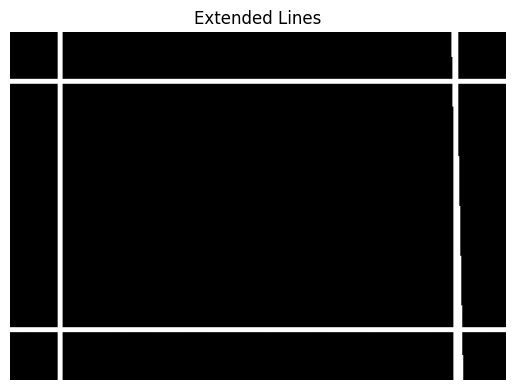

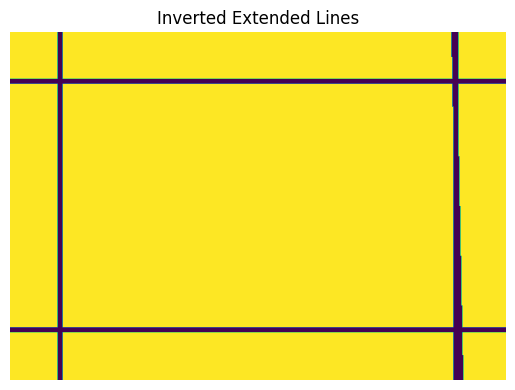

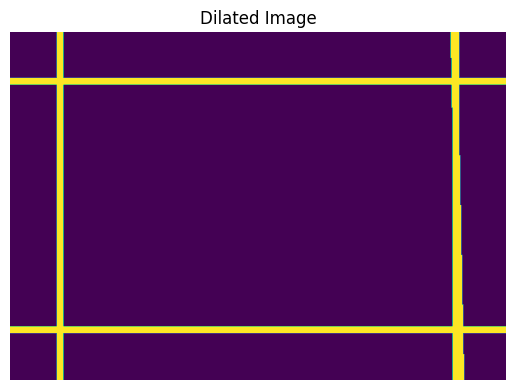

In [3]:

if lines is not None and len(lines)>=4:

    def extend_line(x1, y1, x2, y2, img_shape):
        """Extend a line segment to the borders of the image."""
        height, width = img_shape[:2]
        dx = x2 - x1
        dy = y2 - y1

        if dx == 0:
            return [(x1, 0), (x1, height)]
        
        slope = dy / dx
        intercept = y1 - slope * x1

        def get_line_endpoints():
            endpoints = []
            x_top = (0 - intercept) / slope
            if 0 <= x_top < width:
                endpoints.append((int(x_top), 0))

            x_bottom = (height - intercept) / slope
            if 0 <= x_bottom < width:
                endpoints.append((int(x_bottom), height))

            y_left = intercept
            if 0 <= y_left < height:
                endpoints.append((0, int(y_left)))

            y_right = slope * width + intercept
            if 0 <= y_right < height:
                endpoints.append((width, int(y_right)))

            return endpoints

        endpoints = get_line_endpoints()
        if len(endpoints) == 2:
            return endpoints
        else:
            return []

    # Create a new image for the extended lines
    extended_line_image = np.copy(dilated_edges) * 0

    # List to store extended lines
    extended_lines = []

    # Extend each detected line segment to the image borders
    for line in formatted_lines:
        (x1, y1), (x2, y2) = line  # Correct unpacking for the format
        extended_points = extend_line(x1, y1, x2, y2, dilated_edges.shape)
        if len(extended_points) == 2:
            (x1_new, y1_new), (x2_new, y2_new) = extended_points
            extended_lines.append(((x1_new, y1_new), (x2_new, y2_new)))
            cv2.line(extended_line_image, (x1_new, y1_new), (x2_new, y2_new), (255, 0, 0), 3)

    print("Extended lines:", extended_lines)

    # Overlay the extended lines on the original image
    lines_edges = cv2.addWeighted(dilated_edges, 0.8, extended_line_image, 1, 0)

    # Function to show images (assuming you have it defined)
    showImage("Extended Lines", extended_line_image, cmap='gray')

    def draw_lines_on_black_image(lines, img_shape, color=(0, 255, 0), thickness=2):
        """Draw lines on a black background image."""
        # Create a black image
        black_image = np.zeros((img_shape[0], img_shape[1], 3), dtype=np.uint8)
        
        # Draw each line on the black image
        for (x1, y1), (x2, y2) in lines:
            cv2.line(black_image, (x1, y1), (x2, y2), color, thickness)
        
        return black_image

    # Invert the extended line image
    _, extended_line_image_inv = cv2.threshold(extended_line_image, 127, 255, cv2.THRESH_BINARY_INV)
    showImage("Inverted Extended Lines", extended_line_image_inv)

    kernelbig = np.ones((3, 3), np.uint8)

    # Apply dilation (not erosion as your comment suggests)
    eroded_image = cv2.dilate(extended_line_image, kernelbig, iterations=1)
    showImage("Dilated Image", eroded_image)
else:
    print("No lines detected.")


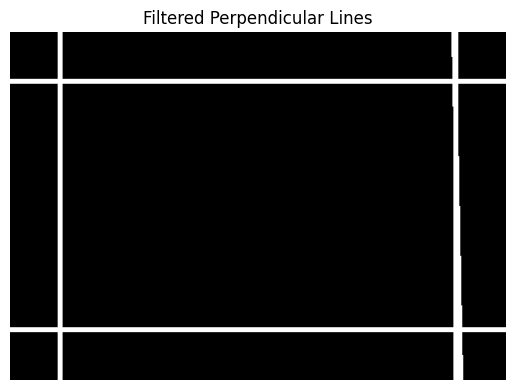

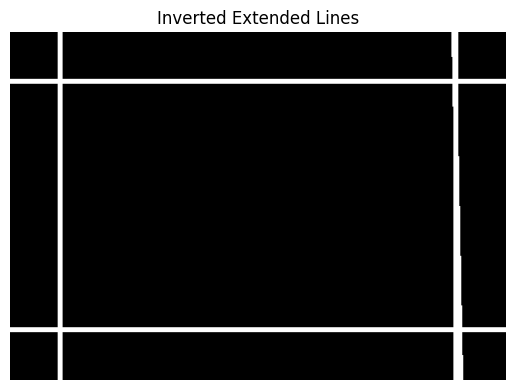

In [4]:
if lines is not None and len(lines)>=4:

    def calculate_angle(line1, line2):
        """Calculate the angle between two lines in degrees."""
        (x1, y1), (x2, y2) = line1
        (x3, y3), (x4, y4) = line2
        
        # Calculate the slopes
        slope1 = np.arctan2((y2 - y1), (x2 - x1))
        slope2 = np.arctan2((y4 - y3), (x4 - x3))
        
        # Calculate the angle in radians and convert to degrees
        angle = np.abs(np.degrees(slope1 - slope2))
        
        # Normalize the angle to the range [0, 180]
        if angle > 180:
            angle = 360 - angle
        
        return angle

    def is_perpendicular(line1, line2, tolerance=10):
        """Check if two lines are perpendicular within a tolerance."""
        angle = calculate_angle(line1, line2)
        return 90 - tolerance <= angle <= 90 + tolerance

    def filter_perpendicular_lines(lines, tolerance=10):
        """Filter lines to keep only perpendicular pairs."""
        perpendicular_lines = []
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                if is_perpendicular(lines[i], lines[j], tolerance):
                    perpendicular_lines.append(lines[i])
                    perpendicular_lines.append(lines[j])
        
        # Remove duplicates
        perpendicular_lines = list(set(perpendicular_lines))
        return perpendicular_lines

    # Filter lines for perpendicularity
    filtered_lines = filter_perpendicular_lines(extended_lines, tolerance=21)

    # Draw filtered lines on a black background
    filtered_line_image = draw_lines_on_black_image(filtered_lines, dilated_edges.shape,(255, 255, 255), 3)
    showImage("Filtered Perpendicular Lines", filtered_line_image)
    _, extended_line_image_inve = cv2.threshold(filtered_line_image, 127, 255, cv2.THRESH_BINARY)
    # gray = cv2.cvtColor(filtered_line_image, cv2.COLOR_BGR2GRAY)
    showImage("Inverted Extended Lines", extended_line_image_inve )

else:
    print("No lines detected")



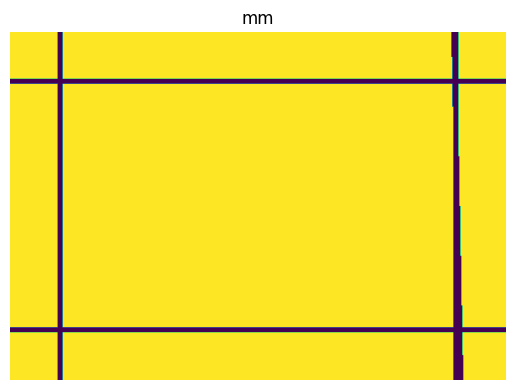

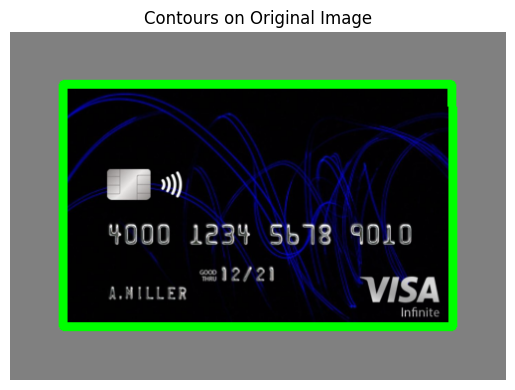

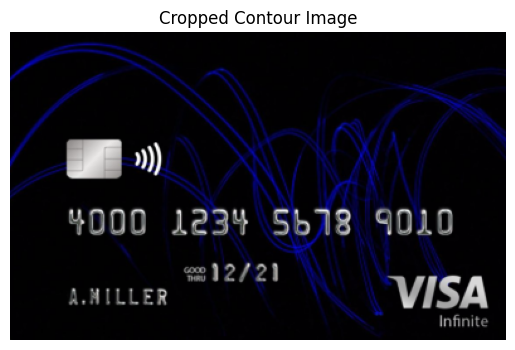

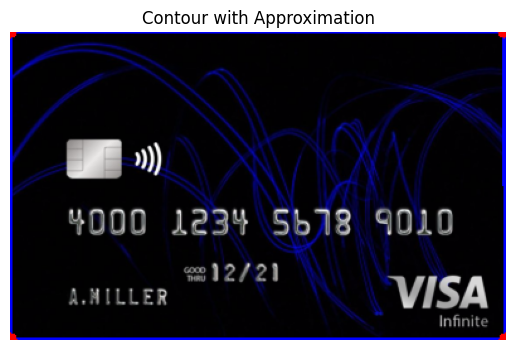

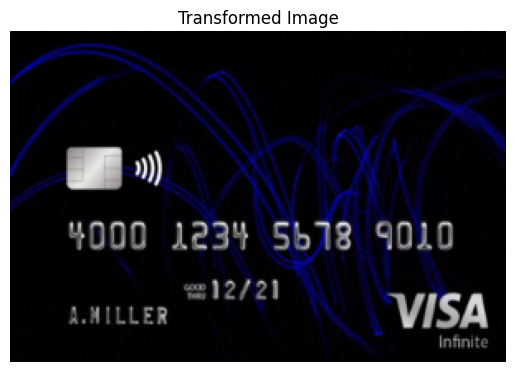

In [5]:
def prepare_image_for_contours(image):
    if len(image.shape) == 3:
        # Convert to grayscale if the image has multiple channels
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Ensure the image is of type uint8
    if gray_image.dtype != np.uint8:
        gray_image = cv2.convertScaleAbs(gray_image)

    return gray_image



# inverted_image = cv2.bitwise_not(extended_line_image)
# showImage("mm",inverted_image)
if lines is not None and len(lines)>=4:
    inverted_imagea = prepare_image_for_contours(cv2.bitwise_not(filtered_line_image))
    showImage("mm",inverted_imagea)
def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    if len(sorted_contours) > 0:
        return sorted_contours[0]
    else:
        print("No contours found.")
        return None

def draw_contours_on_image(contour, image):
    if contour is not None:
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 7)
        return image_with_contours
    else:
        return image

def crop_contour_from_image(image, contour):
    if contour is not None:
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
        result = cv2.bitwise_and(image, image, mask=mask)
        x, y, w, h = cv2.boundingRect(contour)
        cropped_contour_image = result[y:y+h, x:x+w]
        return cropped_contour_image, (x, y, w, h)
    else:
        return image, None

def approximate_and_draw_contour(cropped_image, contour, rect):
    if contour is not None:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) > 0:
            # Adjust approximation points based on the cropping rectangle
            approx = np.array([[pt[0][0] - rect[0], pt[0][1] - rect[1]] for pt in approx])
            
            # Draw the approximated contour on the cropped image
            contour_image = cropped_image.copy()
            cv2.drawContours(contour_image, [approx], -1, (0, 0, 255), 2)  # Red color in BGR
            
            # Draw the points of the approximated contour
            for point in approx:
                cv2.circle(contour_image, tuple(point), 5, (255, 0, 0), -1)  # Blue color in BGR
            
            return contour_image, approx
        else:
            return cropped_image, None
    else:
        return cropped_image, None

def perspective_transform(image, points, dst_size=(300, 200)):
    if len(points) == 4:
        # Ensure points are in the correct order: top-left, top-right, bottom-right, bottom-left
        rect = order_points(points)
        
        # Define the destination points
        width, height = dst_size
        pts2 = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype='float32')

        # Compute the perspective transform matrix
        matrix = cv2.getPerspectiveTransform(rect, pts2)

        # Apply the perspective transform
        transformed_image = cv2.warpPerspective(image, matrix, (width, height))
        return transformed_image
    else:
        print("Not enough points for perspective transformation.")
        return image

def order_points(points):
    # Initialize a list of coordinates that will be ordered as:
    # top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype='float32')

    # Sort the points based on their x-coordinates
    x_sorted = points[np.argsort(points[:, 0]), :]

    # Select the left-most and right-most points
    left_most = x_sorted[:2, :]
    right_most = x_sorted[2:, :]

    # Now sort the left-most points based on their y-coordinates to determine the top-left and bottom-left
    left_most = left_most[np.argsort(left_most[:, 1]), :]
    rect[0] = left_most[0]  # top-left
    rect[3] = left_most[1]  # bottom-left

    # Sort the right-most points based on their y-coordinates to determine the top-right and bottom-right
    right_most = right_most[np.argsort(right_most[:, 1]), :]
    rect[1] = right_most[0]  # top-right
    rect[2] = right_most[1]  # bottom-right

    return rect

# Assuming 'inverted_image' and 'original_image' are defined earlier in your code
if lines is not None and len(lines)>=4:
    largest_contour = find_contours(inverted_imagea)
else:
    largest_contour = find_contours(dilated_mask)
cropped_contour_image, rect = crop_contour_from_image(padded_imagehq, largest_contour)
contour_with_approx, approx_points = approximate_and_draw_contour(cropped_contour_image, largest_contour, rect)

if approx_points is not None and len(approx_points) >= 4:
    # Ensure we have 4 points for perspective transformation
    pts = np.array(approx_points[:4], dtype='float32')
    transformed_image = perspective_transform(cropped_contour_image, pts)

    # Display results
    showImage("Contours on Original Image", draw_contours_on_image(largest_contour, padded_imagehq))
    showImage("Cropped Contour Image", cropped_contour_image)
    showImage("Contour with Approximation", contour_with_approx)
    showImage("Transformed Image", transformed_image)
else:
    print("Insufficient points for perspective transformation.")

In [6]:
# # Define the bounding box for the card number area (hardcoded)
# # Assuming the card number area is centered and occupies the lower third of the card
# box_top_left = (11, 101)  # (x, y) coordinate of the top-left corner of the box
# box_bottom_right = (280, 130)  # (x, y) coordinate of the bottom-right corner of the box
# tranformedCopy=transformed_image.copy()
# # Draw the bounding box around the card number area
# cv2.rectangle(tranformedCopy, box_top_left, box_bottom_right, (0, 0, 255), 2)  # Red bounding box

# showImage("visa card numbers",tranformedCopy)



In [7]:
# pan = transformed_image[box_top_left[1]:box_bottom_right[1], box_top_left[0]:box_bottom_right[0]]

# showImage("pan",pan)

In [8]:
# # Apply Gaussian blur to the image
# blurred = cv2.GaussianBlur(pan, (9, 9), 10.0)

# # Subtract the blurred image from the original image to create the mask
# sharpened = cv2.addWeighted(pan, 1.5, blurred, -0.5, 0)


# showImage('Sharpened Image', sharpened)


# resizedpan=resize_image(sharpened,900)
# showImage('Sharpened Image', resizedpan)

Average Brightness: 14.533133333333334
Image is not very light.


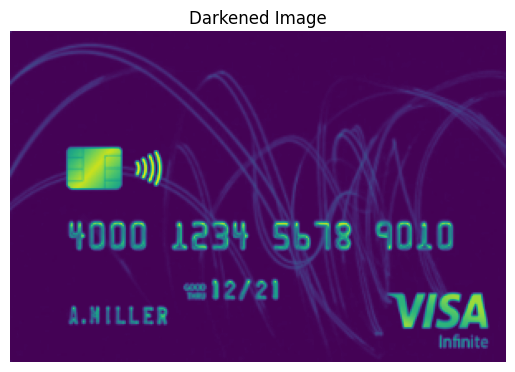

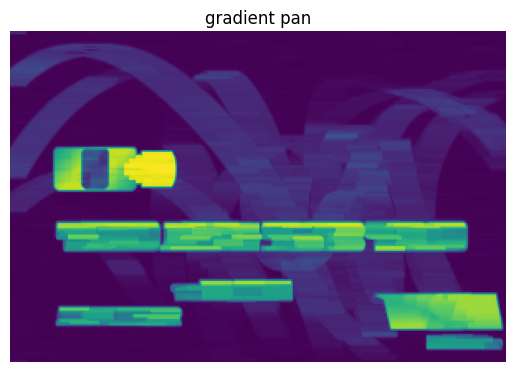

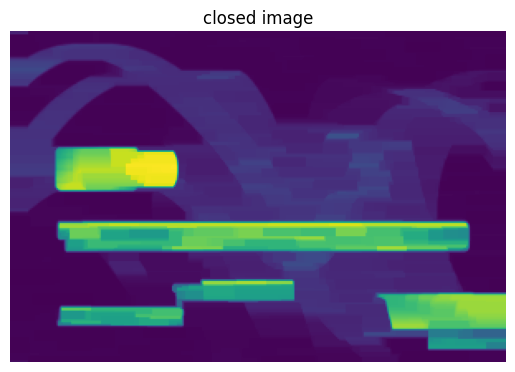

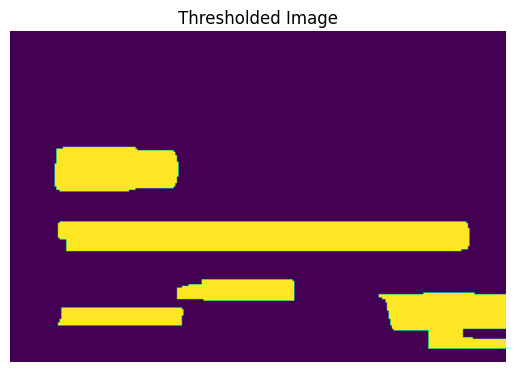

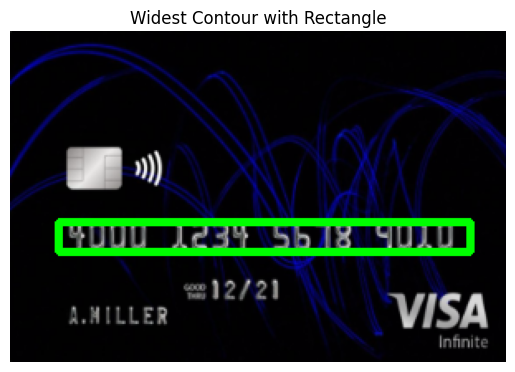

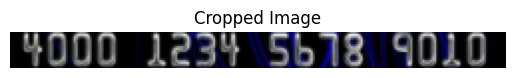

In [9]:
if len(transformed_image.shape)==3:
    gray_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = transformed_image
def check_and_darkened_image(image, threshold=200, darken_factor=2):


    # Calculate average brightness
    average_brightness = np.mean(image)
    print(f'Average Brightness: {average_brightness}')

    # Check if the image is very light
    if average_brightness > threshold:
        print('Image is very light. Darkening it.')
        # Darken the image
        darkened_image = np.clip(image * darken_factor, 0, 255).astype(np.uint8)
        return darkened_image
    else:
        print('Image is not very light.')
        return image

# Example usage
gray_image = check_and_darkened_image(gray_image)
showImage('Darkened Image', gray_image)

kernel = np.ones((2, 18), np.uint8)  # You can adjust the kernel size
gradient = cv2.morphologyEx(gray_image, cv2.MORPH_GRADIENT, kernel)
# Apply Gaussian blur to the image
# blurredg = cv2.GaussianBlur(gradient, (9, 9), 10.0)
showImage("gradient pan",gradient)
# # Subtract the blurred image from the original image to create the mask
# sharpenedg = cv2.addWeighted(gradient, 1.5, blurredg, -0.5, 0)
# showImage("gradient pan",gray_image ,cmap="gray")

# Define a kernel for the morphological operation
kernelmorph = np.ones((5, 20), np.uint8)

# Perform the morphological close operation
closed_image = cv2.morphologyEx(gradient, cv2.MORPH_CLOSE, kernelmorph)

showImage("closed image",closed_image)

_, thresholded_image = cv2.threshold(closed_image, 95, 255, cv2.THRESH_BINARY)#95


showImage('Thresholded Image', thresholded_image)

thresholded_image = cv2.convertScaleAbs(thresholded_image)

# Find contours
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store the widest contour
max_width = 0
widest_contour = None

# Create a copy of the transformed image to draw on
imagepan = transformed_image.copy()

# Loop through each contour
for contour in contours:
    # Get the bounding rectangle for the contour
    x, y, width, height = cv2.boundingRect(contour)
    
    # Check if this is the widest contour
    if width > max_width:
        max_width = width
        widest_contour = contour
        x_widest, y_widest, w_widest, h_widest = x, y, width, height

# Draw the bounding rectangle around the widest contour on the image
if widest_contour is not None:
    cv2.rectangle(imagepan, (x_widest, y_widest), (x_widest + w_widest, y_widest + h_widest), (0, 255, 0), 3)

    # Crop the widest contour area from the image
    cropped_image = transformed_image[y_widest:y_widest + h_widest, x_widest:x_widest + w_widest]

    # Display the original image with the rectangle
    showImage('Widest Contour with Rectangle', imagepan)

    # Display the cropped image
    showImage('Cropped Image', cropped_image)


resizedpan=resize_image(cropped_image,900)





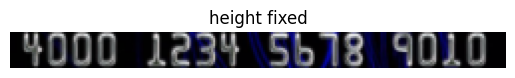

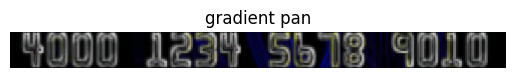

In [10]:
if resizedpan.shape[0]>150:
    resizedpan = resizedpan[:70, :]  


showImage("height fixed" ,resizedpan)

kernelpan = np.ones((5, 6), np.uint8)  # You can adjust the kernel size
gradientpan = cv2.morphologyEx(resizedpan, cv2.MORPH_GRADIENT, kernelpan)
# Apply Gaussian blur to the image
# blurredg = cv2.GaussianBlur(gradient, (9, 9), 10.0)
showImage("gradient pan",gradientpan)






Detected Credit Card Number: 4000123456789010


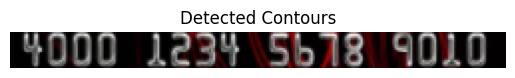

In [11]:
import cv2
import imutils
import numpy as np
from imutils import contours
from matplotlib import pyplot as plt

def compare_white_black(img):
    white_count = cv2.countNonZero(img)
    black_count = img.size - white_count  # Count of black pixels (0)
    return white_count > black_count

def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')  # Hide axis
    plt.title(name)
    plt.show()

FIRST_NUMBER = {
    "3": "American Express",
    "4": "Visa",
    "5": "MasterCard",
    "6": "Discover Card"
}

# Load the reference image of the digits
ref = cv2.imread('Credit-Card0.png')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours in the reference image
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
refCnts = imutils.grab_contours(refCnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}

# Store each digit's region of interest (ROI)
for (i, c) in enumerate(refCnts):
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
    digits[i] = roi

def process_image(image, threshold_value):
    if len(image.shape)==3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray=image
    group = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]
    
    if compare_white_black(group):
        group = cv2.bitwise_not(group)
    
    filtered_image =cv2.medianBlur(cv2.convertScaleAbs(group), 5)

    kernel = np.ones((5, 5), np.uint8)
    eroded = cv2.erode(group, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    (h, w) = group.shape[:2]
    part_width = w // 4
    part_outputs = []

    for i in range(4):
        start_x = i * part_width
        end_x = (i + 1) * part_width
        roi = filtered_image[:, start_x:end_x]
        
        # Find contours in the current part
        digitCnts = cv2.findContours(roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        digitCnts = imutils.grab_contours(digitCnts)

        # Filter out very small contours
        min_contour_area = 200
        min_contour_width = 70
        min_contour_length = 20
        filteredCnts = [c for c in digitCnts if cv2.contourArea(c) > min_contour_area and cv2.boundingRect(c)[2] < min_contour_width and cv2.boundingRect(c)[3] > min_contour_length]

        # Show contours for each part
        part_contours_image = roi.copy()
        cv2.drawContours(part_contours_image, filteredCnts, -1, (0, 255, 0), 2)
        
        if filteredCnts:
            filteredCnts = contours.sort_contours(filteredCnts, method="left-to-right")[0]
        else:
            part_outputs.append([])
            continue

        part_output = []

        for c in filteredCnts:
            (x, y, w, h) = cv2.boundingRect(c)
            digit_roi = roi[y:y + h, x:x + w]
            digit_roi = cv2.resize(digit_roi, (57, 88))
            scores = []

            for (digit, digitROI) in digits.items():
                result = cv2.matchTemplate(digit_roi, digitROI, cv2.TM_CCOEFF)
                (_, score, _, _) = cv2.minMaxLoc(result)
                scores.append(score)

            part_output.append(str(np.argmax(scores)))
        
        part_outputs.append(part_output)

    return group, part_outputs

# Load the input image
image = resizedpan

# Store detected numbers for comparison
detected_numbers = {i: [] for i in range(4)}

for threshold in range(55, 255):  # Adjust the threshold range as needed
    thresholded_image, part_outputs = process_image(cv2.convertScaleAbs(image.copy()), threshold)
    
    # Show the thresholded image
    # showImage(f"Threshold {threshold}", thresholded_image, cmap="gray")

    for i in range(4):
        if len(part_outputs[i]) == 4:
            detected_numbers[i].append(''.join(part_outputs[i]))
        
        # # Check if the list is non-empty before accessing the last element
        # if detected_numbers[i] and detected_numbers[i].count(detected_numbers[i][-1]) == 6:
        #     print(f"Part {i + 1} detected consistently 6 times: {detected_numbers[i][-1]}")
    
    # Check if all parts have been detected 6 times
    if all(len(detected_numbers[i]) >= 7 for i in range(4)):#8
        full_number = ''.join([detected_numbers[i][-1] for i in range(4)])
        print(f"Detected Credit Card Number: {full_number}")
        showImage("Detected Contours", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        break
else:
    print("No valid credit card number detected within the threshold range.")
    image = gradientpan

    # Store detected numbers for comparison
    detected_numbers = {i: [] for i in range(4)}

    for threshold in range(0, 255):  # Adjust the threshold range as needed
        thresholded_image, part_outputs = process_image(image.copy(), threshold)
        
        # Show the thresholded image
        # showImage(f"Threshold {threshold}", thresholded_image, cmap="gray")

        for i in range(4):
            if len(part_outputs[i]) == 4:
                detected_numbers[i].append(''.join(part_outputs[i]))
            
            # # Check if the list is non-empty before accessing the last element
            # if detected_numbers[i] and detected_numbers[i].count(detected_numbers[i][-1]) == 6:
            #     print(f"Part {i + 1} detected consistently 6 times: {detected_numbers[i][-1]}")
        
        # Check if all parts have been detected 6 times
        if all(len(detected_numbers[i]) >= 2 for i in range(4)):#8
            full_number = ''.join([detected_numbers[i][-1] for i in range(4)])
            print(f"Detected Credit Card Number: {full_number}")
            showImage("Detected Contours", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            break
